In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import sklearn.preprocessing as preproc
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
from pract2_utils import *

In [2]:
RESULTS='results/accidentes/'
DATA='data/accidentes_2013.csv'

def readData(results_file):
    return pd.read_csv(results_file,header=0,engine='python')

In [3]:
dataTot=readData(DATA)
dataTot

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
0,8,14.0,3,Bizkaia,País Vasco,NO_ES_ISLA,3,3,0,0.054104,...,NINGUNA (SOLO NORMA),MOJADA,PLENO DÍA,LLUVIA FUERTE,FACTORES ATMOSFÉRICOS,OTRA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
1,6,18.0,6,Bizkaia,País Vasco,NO_ES_ISLA,1,1,0,0.000000,...,SEMÁFORO,MOJADA,PLENO DÍA,LLOVIZNANDO,OTRA_CAUSA,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA
2,11,17.0,2,Tarragona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,SEÑAL DE STOP,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?
3,1,9.0,3,Lleida,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,PLENO DÍA,LLOVIZNANDO,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Múltiple o en...,?,NINGUNA MEDIDA
4,11,22.0,7,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.000000,...,?,MOJADA,NOCHE: ILUMINACIÓN SUFICIENTE,LLUVIA FUERTE,?,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontolateral),?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89514,6,19.0,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.018035,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Atropello a peatón aislado o en grupo,FLUIDA,NINGUNA MEDIDA
89515,4,17.0,4,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.000000,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Lateral),FLUIDA,NINGUNA MEDIDA
89516,1,23.0,5,Melilla,Ceuta y Melilla,NO_ES_ISLA,1,1,0,0.018035,...,SEÑAL DE CEDA EL PASO,SECA Y LIMPIA,NOCHE: ILUMINACIÓN SUFICIENTE,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Frontolateral),FLUIDA,NINGUNA MEDIDA
89517,2,15.0,3,Melilla,Ceuta y Melilla,NO_ES_ISLA,2,2,0,0.000000,...,NINGUNA (SOLO NORMA),SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,SIN RESTRICCIÓN,NINGUNA,SI HAY ACERA,Colisión de vehículos en marcha (Alcance),DENSA,NINGUNA MEDIDA


In [4]:
dataTot.columns

Index(['MES', 'HORA', 'DIASEMANA', 'PROVINCIA', 'COMUNIDAD_AUTONOMA', 'ISLA',
       'TOT_VICTIMAS', 'TOT_VICTIMAS30D', 'TOT_MUERTOS', 'TOT_MUERTOS30D',
       'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_GRAVES30D', 'TOT_HERIDOS_LEVES',
       'TOT_HERIDOS_LEVES30D', 'TOT_VEHICULOS_IMPLICADOS', 'ZONA',
       'ZONA_AGRUPADA', 'RED_CARRETERA', 'TIPO_VIA', 'TRAZADO_NO_INTERSEC',
       'TIPO_INTERSEC', 'ACOND_CALZADA', 'PRIORIDAD', 'SUPERFICIE_CALZADA',
       'LUMINOSIDAD', 'FACTORES_ATMOSFERICOS', 'VISIBILIDAD_RESTRINGIDA',
       'OTRA_CIRCUNSTANCIA', 'ACERAS', 'TIPO_ACCIDENTE',
       'DENSIDAD_CIRCULACION', 'MEDIDAS_ESPECIALES'],
      dtype='object')

In [5]:
# Atributos numéricos que reflejan la gravedad del accidente, sobre los que haré clustering
atributos=['TOT_VICTIMAS','TOT_MUERTOS','TOT_HERIDOS_GRAVES','TOT_HERIDOS_LEVES','TOT_VEHICULOS_IMPLICADOS']

## Caso de uso 2: Estudio de los accidentes a altas horas de la madrugada

Filtramos los datos para quedarnos con accidentes que ocurren a altas horas de la madrugada.

In [6]:
data2=dataTot[dataTot.HORA<=6] 
data=data2[atributos] # En data2 quedan el resto de variables
data

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS
21,2,0,0,2,1
45,3,0,1,2,1
46,2,0,0,2,1
57,1,1,0,0,2
86,1,0,0,1,1
...,...,...,...,...,...
89423,3,0,0,3,1
89435,3,0,0,3,2
89446,2,0,0,2,2
89447,3,0,0,3,2


In [7]:
for a in atributos:
    print(a)
    print(Counter(data[a]))

TOT_VICTIMAS
Counter({1: 4181, 2: 1110, 3: 355, 4: 193, 5: 88, 6: 17, 7: 12, 8: 9, 9: 3, 10: 1})
TOT_MUERTOS
Counter({0: 5801, 1: 157, 2: 10, 3: 1})
TOT_HERIDOS_GRAVES
Counter({0: 5201, 1: 676, 2: 74, 3: 14, 4: 4})
TOT_HERIDOS_LEVES
Counter({1: 3731, 2: 979, 0: 665, 3: 323, 4: 167, 5: 71, 7: 13, 6: 12, 8: 6, 9: 1, 10: 1})
TOT_VEHICULOS_IMPLICADOS
Counter({1: 3387, 2: 2247, 3: 227, 4: 60, 5: 31, 6: 12, 7: 2, 0: 1, 9: 1, 8: 1})


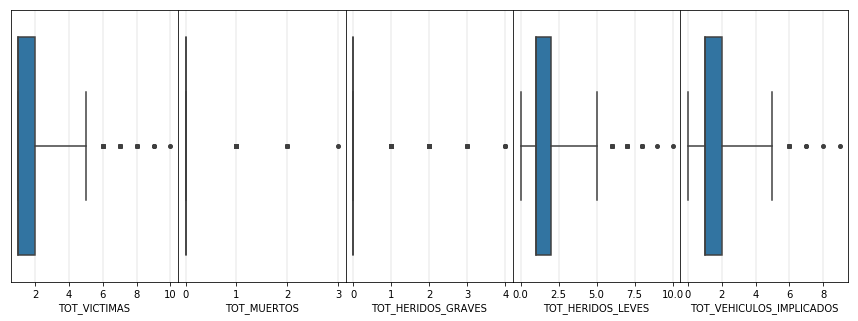

In [8]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(1, n_var, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=1, desat=None)

rango = []
for j in range(n_var):
    d=data[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(1):
    dat_filt = data
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[j], whis=3,showfliers=True)

        if (i == 0):
            axes[j].set_xlabel(atributos[j])
        else:
            axes[j].set_xlabel("")

        if (j == 0):
            axes[j].set_ylabel("")
        else:
            axes[j].set_ylabel("")

        axes[j].set_yticks([])
        axes[j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

In [9]:
# Normalizar los datos
normalizer=preproc.MinMaxScaler()
data_norm=normalizer.fit_transform(data)
data_norm

array([[0.11111111, 0.        , 0.        , 0.2       , 0.11111111],
       [0.22222222, 0.        , 0.25      , 0.2       , 0.11111111],
       [0.11111111, 0.        , 0.        , 0.2       , 0.11111111],
       ...,
       [0.11111111, 0.        , 0.        , 0.2       , 0.22222222],
       [0.22222222, 0.        , 0.        , 0.3       , 0.22222222],
       [0.        , 0.        , 0.        , 0.1       , 0.22222222]])

### K-Means

In [10]:
# Elección de un número adecuado de Clústers atendiendo a las métricas
K=list(range(2,10))
silhouette=[]
calinski=[]
for k in K:
    results = KMeans(n_clusters=k, random_state=0).fit(data_norm)
    sil, cal = measures_silhoutte_calinski(data_norm, results.labels_)
    silhouette.append(sil)
    calinski.append(cal)

In [11]:
print(silhouette)
print(calinski)

[0.5976557737387063, 0.6051934122627416, 0.5599799072596432, 0.5980975278272924, 0.7136414866797324, 0.7198945488757651, 0.7375867003363279, 0.7777131896978559]
[3023.2290840361243, 3620.773777961237, 3403.0074721083447, 3516.7066546279298, 3796.6293512906664, 3884.408527765032, 3916.431543161539, 4347.455957160576]


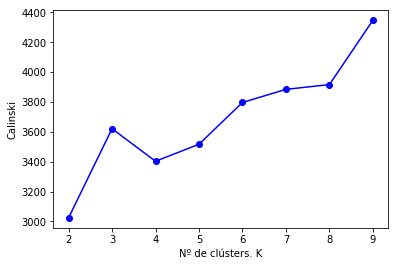

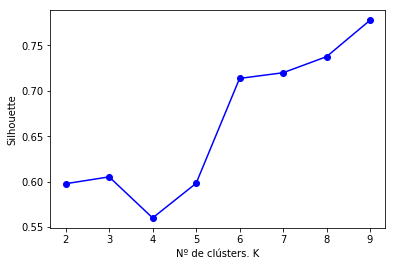

In [12]:
plt.plot(K,calinski, 'bo-')
plt.xlabel('Nº de clústers. K')
plt.ylabel('Calinski')
plt.show()
plt.plot(K,silhouette,'bo-')
plt.ylabel('Silhouette')
plt.xlabel('Nº de clústers. K')
plt.show()

Nos quedaremos con K=3. Introducir más clústers no gana tanto score y hace la segmentación muy difícil de interpretar.

In [13]:
K=3
results = KMeans(n_clusters=K, random_state=0).fit(data_norm)
labels=results.labels_
centroids=results.cluster_centers_

Análisis.

In [14]:
Counter(labels)

Counter({0: 4652, 1: 717, 2: 600})

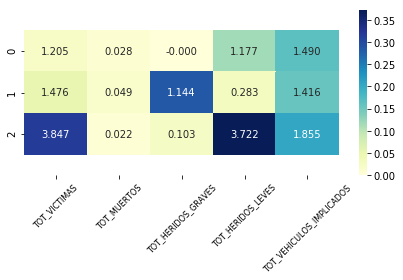

In [15]:
visualize_centroids(centroids, np.array(data), atributos, denormCentroids=True)

/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


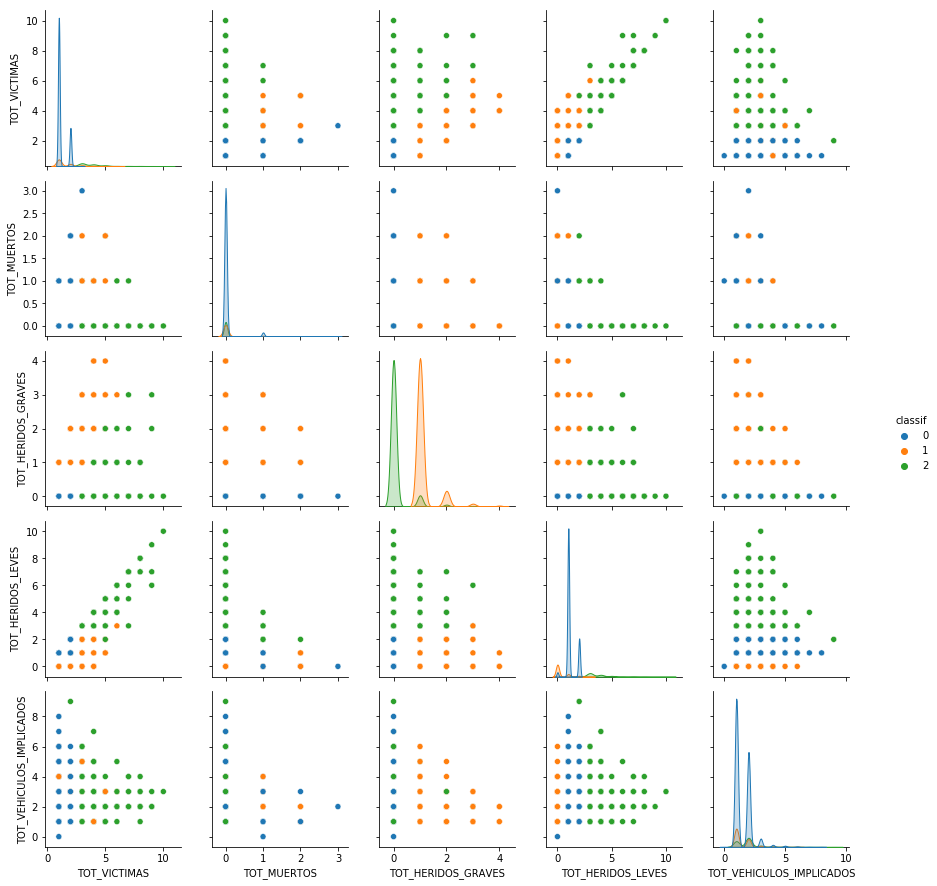

In [16]:
pairplot(data,atributos,labels)

In [17]:
dataC=data.copy()
dataC['cluster']=labels
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
21,2,0,0,2,1,0
45,3,0,1,2,1,1
46,2,0,0,2,1,0
57,1,1,0,0,2,0
86,1,0,0,1,1,0
...,...,...,...,...,...,...
89423,3,0,0,3,1,2
89435,3,0,0,3,2,2
89446,2,0,0,2,2,0
89447,3,0,0,3,2,2


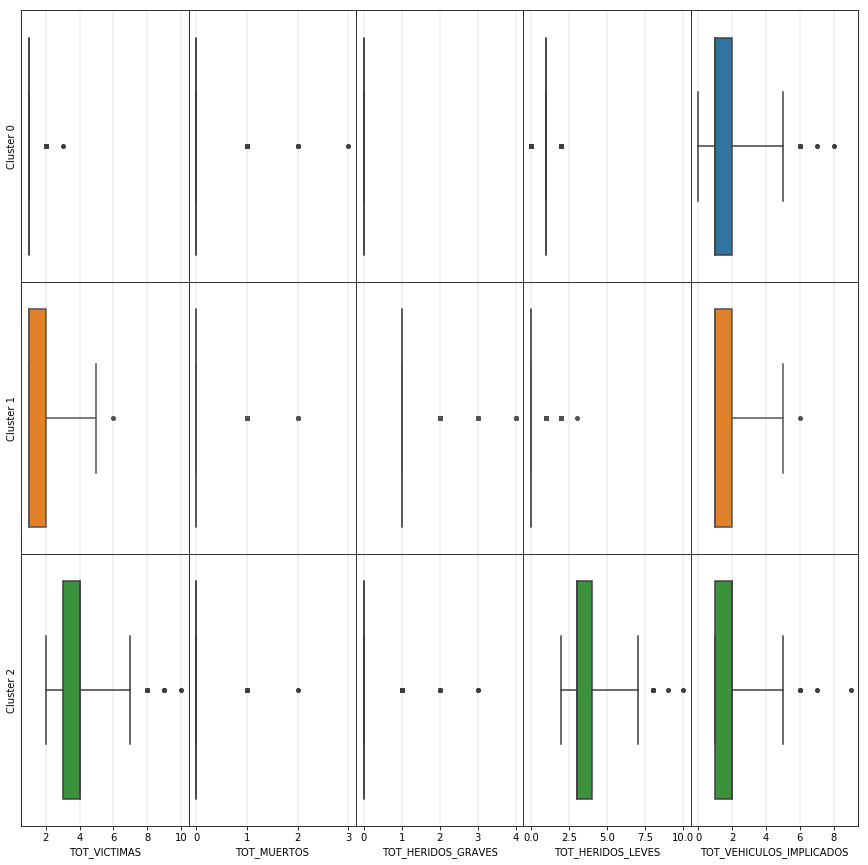

In [18]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(K, n_var, sharey=True, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=K, desat=None)

rango = []
for j in range(n_var):
    d=dataC[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(K):
    dat_filt = dataC.loc[dataC['cluster'] == i]
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[i, j], whis=3,showfliers=True)

        if (i == K - 1):
            axes[i, j].set_xlabel(atributos[j])
        else:
            axes[i, j].set_xlabel("")

        if (j == 0):
            axes[i, j].set_ylabel("Cluster " + str(i))
        else:
            axes[i, j].set_ylabel("")

        axes[i, j].set_yticks([])
        axes[i, j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[i, j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

Con K=6 también obtenemos una ganancia considerable en las métricas, pero el análisis es más complejo debido al mayor número de clústers.

Counter({1: 2213, 5: 1399, 0: 1213, 4: 688, 2: 301, 3: 155})


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


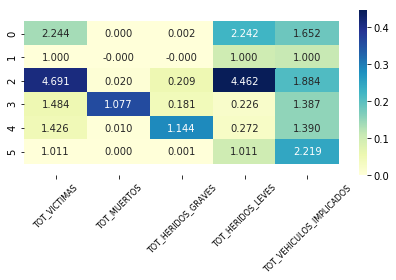

In [19]:
K=6
results = KMeans(n_clusters=K, random_state=0).fit(data_norm)
labels=results.labels_
centroids=results.cluster_centers_

data2['cluster']=labels # Para después observar el resto de variables

print(Counter(labels))

# Introduce un clúster con muertos, antes los despreciaba
visualize_centroids(centroids, np.array(data), atributos, denormCentroids=True)

/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

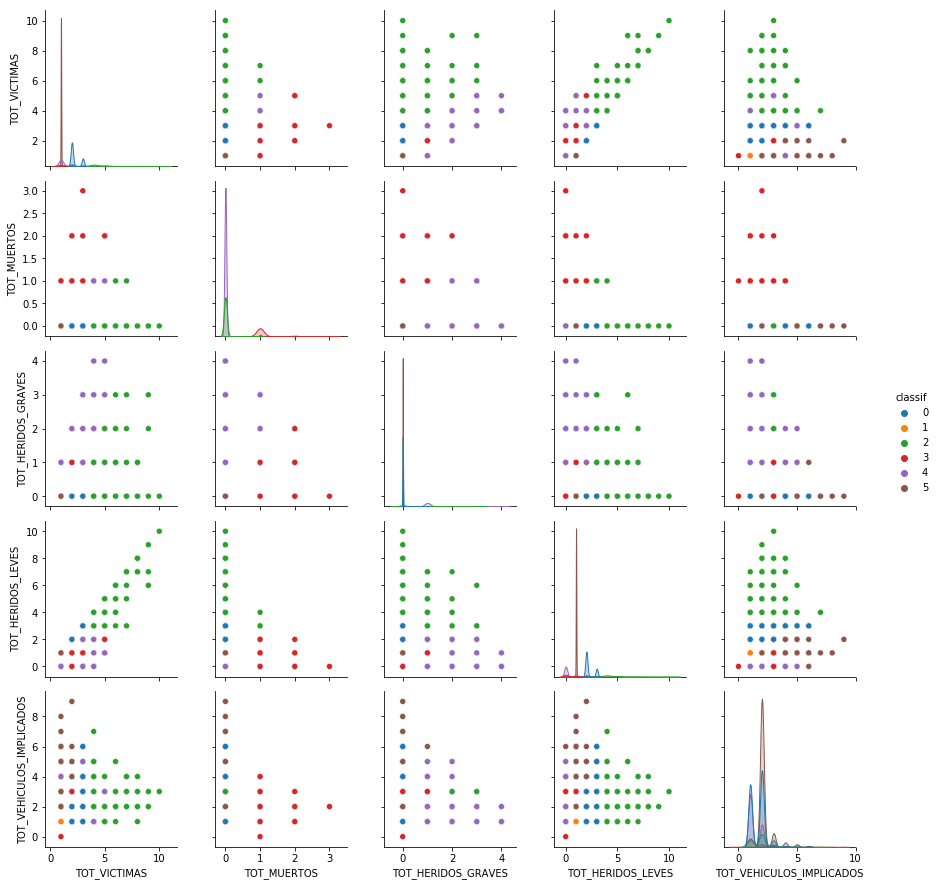

In [20]:
pairplot(data,atributos,labels)

In [21]:
dataC=data.copy()
dataC['cluster']=labels
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
21,2,0,0,2,1,0
45,3,0,1,2,1,4
46,2,0,0,2,1,0
57,1,1,0,0,2,3
86,1,0,0,1,1,1
...,...,...,...,...,...,...
89423,3,0,0,3,1,0
89435,3,0,0,3,2,0
89446,2,0,0,2,2,0
89447,3,0,0,3,2,0


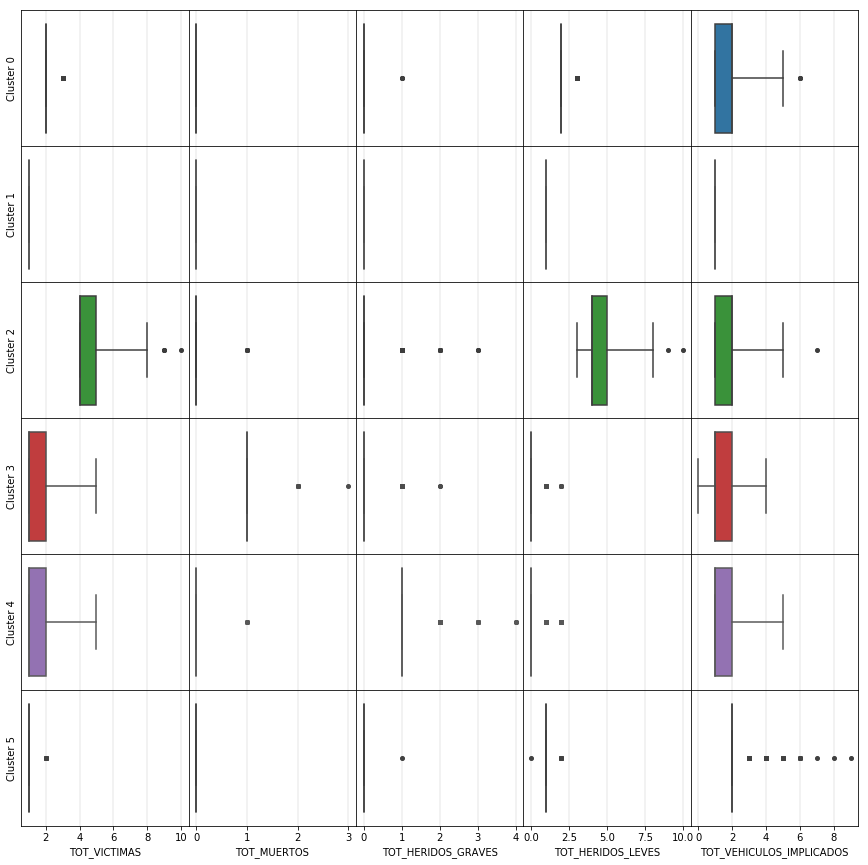

In [22]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(K, n_var, sharey=True, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=K, desat=None)

rango = []
for j in range(n_var):
    d=dataC[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(K):
    dat_filt = dataC.loc[dataC['cluster'] == i]
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[i, j], whis=3,showfliers=True)

        if (i == K - 1):
            axes[i, j].set_xlabel(atributos[j])
        else:
            axes[i, j].set_xlabel("")

        if (j == 0):
            axes[i, j].set_ylabel("Cluster " + str(i))
        else:
            axes[i, j].set_ylabel("")

        axes[i, j].set_yticks([])
        axes[i, j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[i, j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

### DBSCAN

Ahora utilizaremos el algoritmo DBSCAN para formar los clústers

In [23]:
# Elección de un umbral de distancia por encima del cual no se mezclarán más clústers
#E=[0.1,0.15,0.2,0.25,0.3,0.35]
E=[0.1,0.11,0.12,0.13,0.14,0.15]
# Con 0.35 en adelante ya hace un sólo clúster
K=[]
silhouette=[]
calinski=[]
for e in E:
    results = DBSCAN(eps=e, min_samples=50, n_jobs=4).fit(data_norm)
    sil, cal = measures_silhoutte_calinski(data_norm, results.labels_)
    silhouette.append(sil)
    calinski.append(cal)
    K.append(max(results.labels_)+1) # La etiqueta -1 corresponde a un clúster de muestras que el algoritmo considera ruidosas, luego lo desecharemos

In [24]:
print(silhouette)
print(calinski)
print(K)

[0.8710220293321265, 0.8710220293321265, 0.5900064904722773, 0.5900064904722773, 0.5900064904722773, 0.5349637984880388]
[888.2122785899895, 888.2122785899895, 1540.8634818093465, 1540.8634818093465, 1540.8634818093465, 1053.2968281286423]
[14, 14, 8, 8, 8, 3]


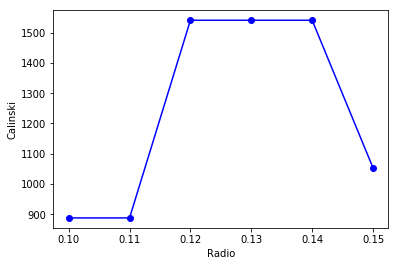

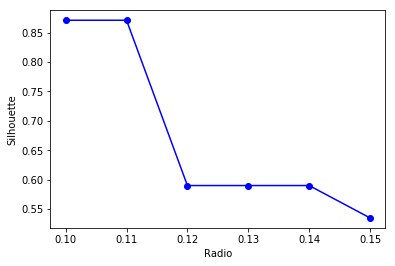

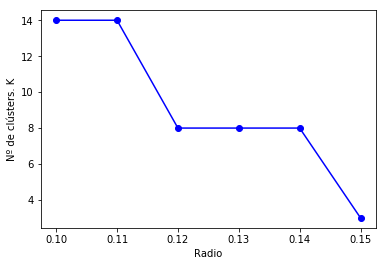

In [25]:
plt.plot(E,calinski, 'bo-')
plt.ylabel('Calinski')
plt.xlabel('Radio')
plt.show()
plt.plot(E,silhouette,'bo-')
plt.ylabel('Silhouette')
plt.xlabel('Radio')
plt.show()
plt.plot(E,K,'bo-')
plt.ylabel('Nº de clústers. K')
plt.xlabel('Radio')
plt.show()

Elegimos epsilon=0.15

In [26]:
E=0.15 #0.12 produce 8 clústers y considera demasiados elementos (266) como ruidosos
results = DBSCAN(eps=E, min_samples=50, n_jobs=4).fit(data_norm)
labels=results.labels_

In [27]:
Counter(labels)

Counter({-1: 183, 0: 5042, 1: 628, 2: 116})

Calculamos los centroides a mano

In [28]:
dataC=data.copy()
dataC['cluster']=labels
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
21,2,0,0,2,1,0
45,3,0,1,2,1,1
46,2,0,0,2,1,0
57,1,1,0,0,2,2
86,1,0,0,1,1,0
...,...,...,...,...,...,...
89423,3,0,0,3,1,0
89435,3,0,0,3,2,0
89446,2,0,0,2,2,0
89447,3,0,0,3,2,0


In [29]:
# Eliminamos los 183 ejemplos que el algoritmo considera ruidosos
dataC.drop(dataC[dataC['cluster']==-1].index,inplace=True)
dataC

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS,cluster
21,2,0,0,2,1,0
45,3,0,1,2,1,1
46,2,0,0,2,1,0
57,1,1,0,0,2,2
86,1,0,0,1,1,0
...,...,...,...,...,...,...
89423,3,0,0,3,1,0
89435,3,0,0,3,2,0
89446,2,0,0,2,2,0
89447,3,0,0,3,2,0


In [30]:
centroids = dataC.groupby('cluster').mean()
centroids

,TOT_VICTIMAS,TOT_MUERTOS,TOT_HERIDOS_GRAVES,TOT_HERIDOS_LEVES,TOT_VEHICULOS_IMPLICADOS
cluster,,,,,
0,1.455772,0.0,0.0,1.455772,1.519238
1,1.343949,0.0,1.0,0.343949,1.347134
2,1.120690,1.0,0.0,0.120690,1.250000


In [31]:
centroids=centroids.values
centroids

array([[1.45577152, 0.        , 0.        , 1.45577152, 1.5192384 ],
       [1.34394904, 0.        , 1.        , 0.34394904, 1.34713376],
       [1.12068966, 1.        , 0.        , 0.12068966, 1.25      ]])

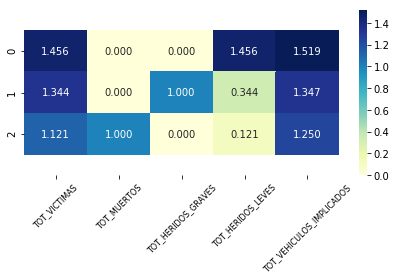

In [32]:
visualize_centroids(centroids, np.array(data), atributos, denormCentroids=False)

/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dcabezas/.local/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 var

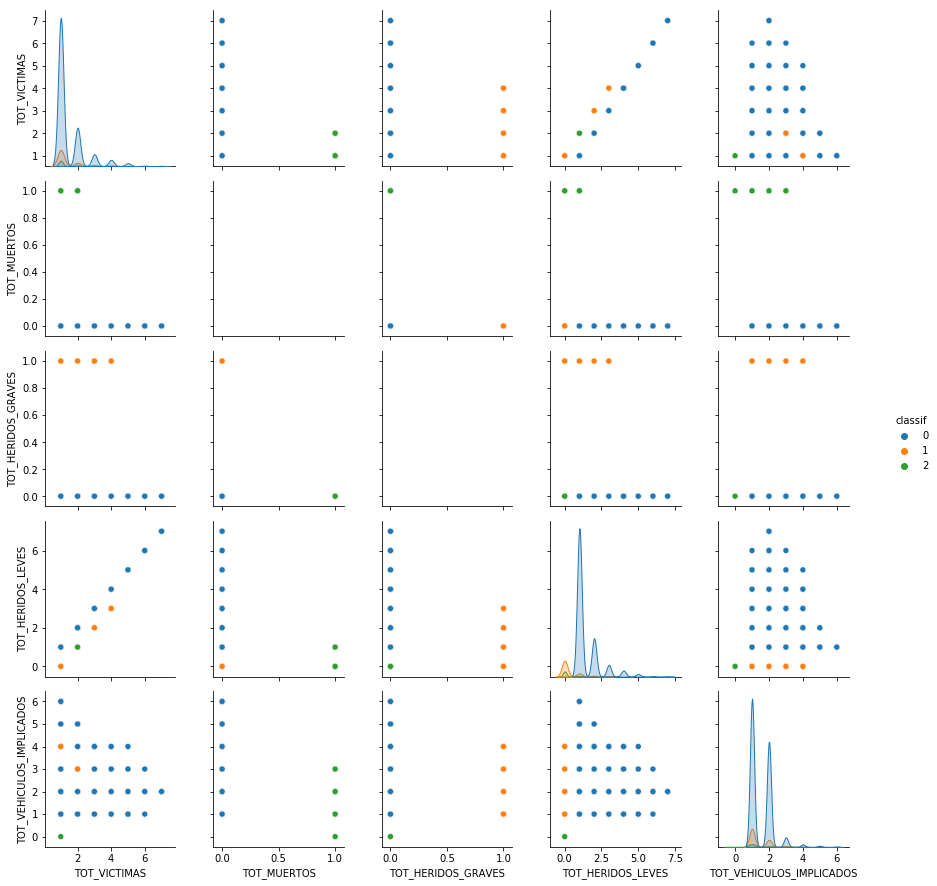

In [33]:
labels=[l for l in labels if l != -1]
pairplot(dataC,atributos,labels)

In [34]:
K=max(labels)+1

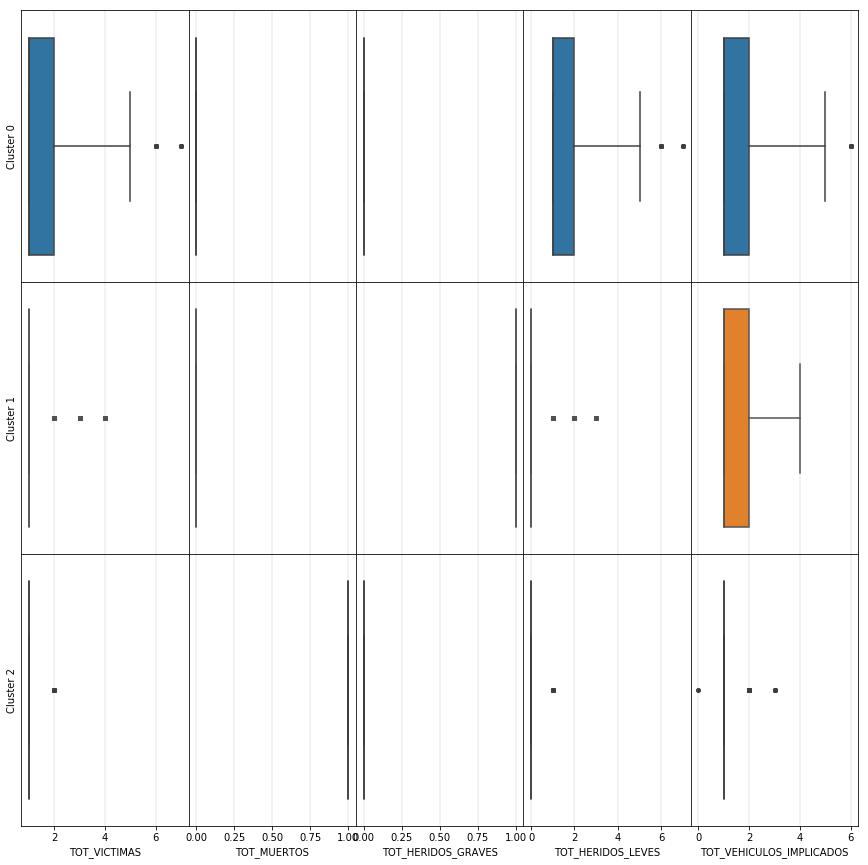

In [35]:
# Box Plot
n_var = len(atributos)
fig, axes = plt.subplots(K, n_var, sharey=True, figsize=(15, 15))
fig.subplots_adjust(wspace=0, hspace=0)

colors = sns.color_palette(palette=None, n_colors=K, desat=None)

rango = []
for j in range(n_var):
    d=dataC[atributos[j]]
    rango.append([d.min(), d.max()])

for i in range(K):
    dat_filt = dataC.loc[dataC['cluster'] == i]
    for j in range(n_var):
        ax  = sns.boxplot(x=dat_filt[atributos[j]],
                         color=colors[i],
                         flierprops={
                             'marker': 'o',
                             'markersize': 4
                         },
                         ax=axes[i, j], whis=3,showfliers=True)

        if (i == K - 1):
            axes[i, j].set_xlabel(atributos[j])
        else:
            axes[i, j].set_xlabel("")

        if (j == 0):
            axes[i, j].set_ylabel("Cluster " + str(i))
        else:
            axes[i, j].set_ylabel("")

        axes[i, j].set_yticks([])
        axes[i, j].grid(axis='x',
                        linestyle='-',
                        linewidth='0.2',
                        color='gray')
        axes[i, j].grid(axis='y', b=False)

        ax.set_xlim(rango[j][0] - 0.05 * (rango[j][1] - rango[j][0]),
                    rango[j][1] + 0.05 * (rango[j][1] - rango[j][0]))

In [36]:
print(sum(data.TOT_MUERTOS))
print(sum(data.TOT_HERIDOS_GRAVES))

180
882


### Estudio de variables circunstanciales y de tipo dentro en los clusters

In [44]:
Counter(data2.TIPO_ACCIDENTE)

Counter({'Atropello a animales sueltos': 111,
         'Atropello a peatón aislado o en grupo': 347,
         'Atropello a peatón reparando vehículo': 1,
         'Atropello a peatón sosteniendo bicicleta': 5,
         'Colisión de vehículo con obstáculo en calzada (Otro objeto o material)': 320,
         'Colisión de vehículo con obstáculo en calzada (Valla de defensa)': 25,
         'Colisión de vehículo con obstáculo en calzada (Vehículo estacionado o averiado)': 75,
         'Colisión de vehículos en marcha (Alcance)': 707,
         'Colisión de vehículos en marcha (Frontal)': 138,
         'Colisión de vehículos en marcha (Frontolateral)': 893,
         'Colisión de vehículos en marcha (Lateral)': 266,
         'Colisión de vehículos en marcha (Múltiple o en caravana)': 172,
         'Otro tipo de accidente': 484,
         'Salida de la vía por la derecha con colisión (Choque con cuneta o bordillo)': 133,
         'Salida de la vía por la derecha con colisión (Choque con muro o ed

In [37]:
cluster_3=data2[data2.cluster==3]
cluster_4=data2[data2.cluster==4]
data2.shape[0], cluster_3.shape[0], cluster_4.shape[0]

(5969, 155, 688)

In [38]:
conjuntos=[data2,cluster_3,cluster_4]

In [48]:
def prop(condicion,data):
    n=0
    for i, row in data.iterrows():
        if condicion(row):
            n+=1
    return n/data.shape[0]

def propChoques_front_lat(data):
    condicion=(lambda x: '(Front' in x.TIPO_ACCIDENTE or '(Lateral)' in x.TIPO_ACCIDENTE)
    return prop(condicion,data)

def propAlcances(data):
    condicion=(lambda x: '(Alcance)' in x.TIPO_ACCIDENTE)
    return prop(condicion,data)

def propInterurbanas(data):
    condicion=(lambda x: x.ZONA_AGRUPADA=='VÍAS INTERURBANAS')
    return prop(condicion,data)

def propUrbanas(data):
    condicion=(lambda x: x.ZONA_AGRUPADA=='VÍAS URBANAS')
    return prop(condicion,data)

def propAtropellos(data):
    condicion=(lambda x: 'peatón' in x.TIPO_ACCIDENTE)
    return prop(condicion,data)

In [40]:
for c in conjuntos: # Proporción de choques frontales y laterales
    print(propChoques_front_lat(c))

0.21728932819567767
0.12258064516129032
0.15988372093023256


In [41]:
for c in conjuntos: # Proporción de choques por alcance
    print(propAlcances(c))

0.11844530072038867
0.06451612903225806
0.06831395348837209


In [42]:
for c in conjuntos:
    print(propUrbanas(c))

0.5015915563746021
0.2709677419354839
0.45348837209302323


In [43]:
for c in conjuntos:
    print(propInterurbanas(c))

0.4984084436253979
0.7290322580645161
0.5465116279069767


In [49]:
for c in conjuntos:
    print(propAtropellos(c))

0.05913888423521528
0.17419354838709677
0.09593023255813954
